# Day 13: Time Series Analysis with Pandas

Welcome to Day 13! Today, we're focusing on one of the most powerful features of Pandas: its ability to work with time series data. Analyzing data over time is fundamental in many fields, including finance, economics, and science.

We will learn how to create, manipulate, and analyze data that is indexed by time. Specifically, we'll cover:
1.  Creating a DatetimeIndex.
2.  Slicing and selecting time-stamped data.
3.  Resampling data to different time frequencies.
4.  Calculating rolling window statistics, like moving averages.

Let's get started with our imports.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a default figure size for our plots
plt.rcParams["figure.figsize"] = (12, 6)

---

## Part 1: Creating a Time Series DataFrame

The key to time series analysis in Pandas is the `DatetimeIndex`. To demonstrate this, we'll create a sample dataset representing the daily sales of a fictional store for the year 2025.

In [12]:
# Set a seed for reproducibility
np.random.seed(42)

# Create a date range for the entire year of 2025
dates = pd.date_range(
    start="2025-01-01", end="2025-12-31", freq="D"
)  # 'D' for daily frequency

# Generate some random sales data
# Sales have a base of 100, some noise, and a slight upward trend over the year
trend = np.arange(len(dates)) * 0.1
noise = np.random.randint(-20, 20, size=len(dates))
sales_data = 100 + trend + noise

# Create the DataFrame with the dates as the index
df = pd.DataFrame(data={"sales": sales_data}, index=dates)

print("DataFrame Info:")
df.info()
print("\nFirst 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2025-01-01 to 2025-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB

First 5 rows:


,sales
2025-01-01,118.0
2025-01-02,108.1
2025-01-03,94.2
2025-01-04,87.3
2025-01-05,100.4



Last 5 rows:


,sales
2025-12-27,147.0
2025-12-28,145.1
2025-12-29,150.2
2025-12-30,155.3
2025-12-31,131.4


---

## Part 2: Time-based Indexing and Slicing

With a `DatetimeIndex`, Pandas allows for incredibly intuitive ways to select and slice your data.

**Exercise 2.1:** Select and display all the sales data just for the month of June 2025.

In [18]:
# Your code here
june_sales = df.loc["2025-06"]
display(june_sales.head())

,sales
2025-06-01,95.1
2025-06-02,121.2
2025-06-03,107.3
2025-06-04,97.4
2025-06-05,133.5


**Solution 2.1:**

In [ ]:
# You can pass a string representing the month
june_sales = df.loc["2025-06"]
display(june_sales.head())

**Exercise 2.2:** Select the sales data for the second quarter of the year (April 1st to June 30th) and plot it as a line chart.

Text(0, 0.5, 'Daily Sales')

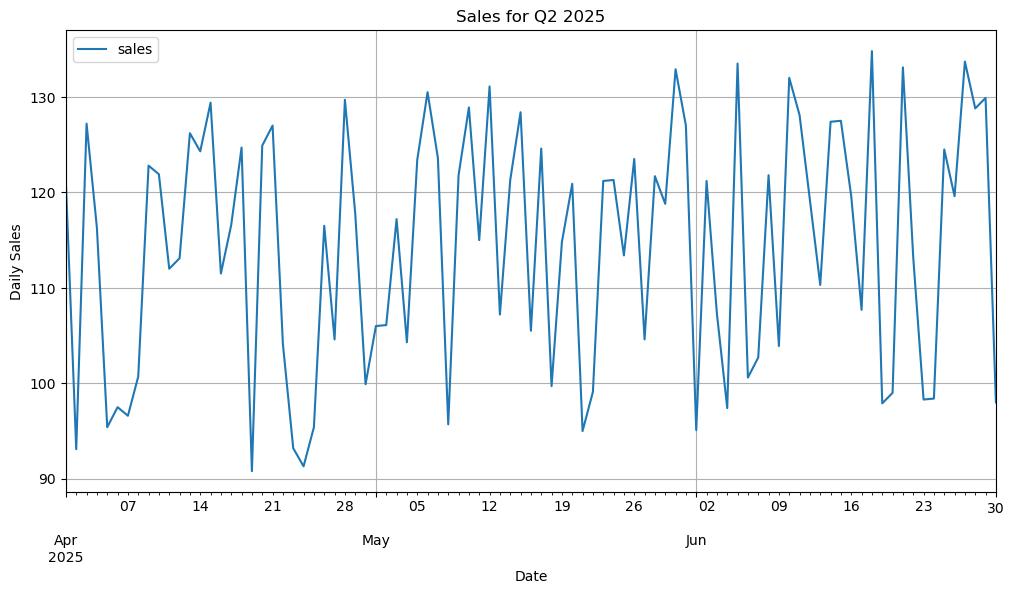

In [22]:
# Your code here
q2_sales = df.loc["2025-04-01":"2025-06-30"]
q2_sales.plot(title="Sales for Q2 2025", grid=True)
plt.xlabel("Date")
plt.ylabel("Daily Sales")

**Solution 2.2:**

In [ ]:
# Use slicing with date strings
q2_sales = df.loc["2025-04-01":"2025-06-30"]

q2_sales.plot(title="Sales for Q2 2025", grid=True)
plt.xlabel("Date")
plt.ylabel("Daily Sales")
plt.show()

---

## Part 3: Resampling

Resampling is the process of changing the time frequency of your data. This is a very common operation.
- **Downsampling:** Going from a high frequency to a low frequency (e.g., daily to monthly). You need to aggregate the data (e.g., `sum()`, `mean()`).
- **Upsampling:** Going from a low frequency to a high frequency (e.g., daily to hourly). You need to decide how to fill the new data points (e.g., `ffill()`, `bfill()`).

We will focus on downsampling.

**Exercise 3.1:** Downsample our daily sales data to find the total monthly sales. Then, plot the result as a bar chart.

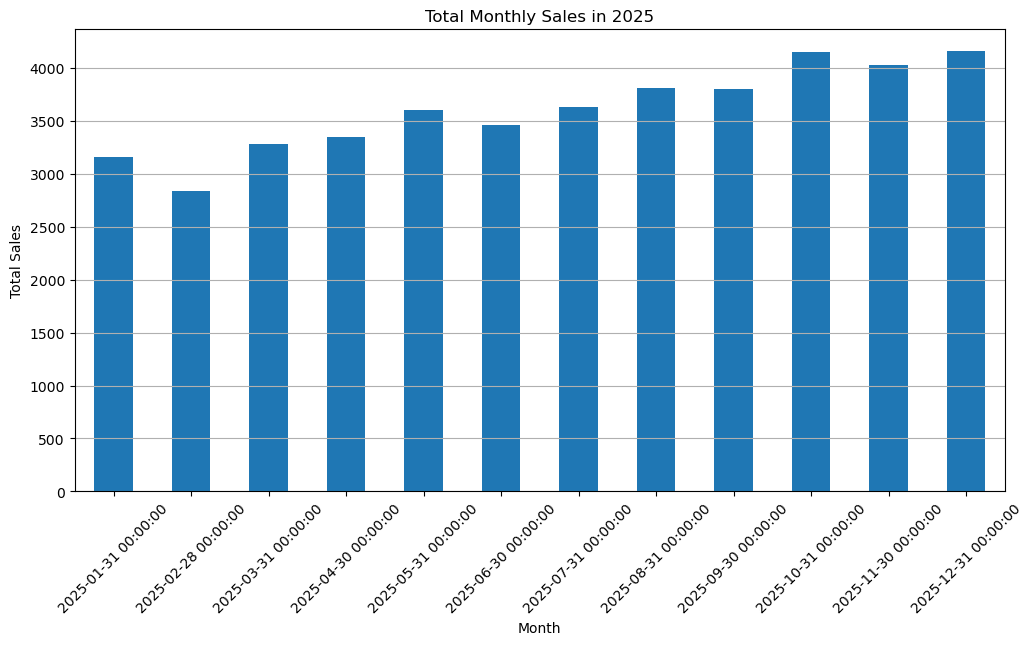

In [38]:
# Your code here
monthly_sales = df["sales"].resample("ME").sum()
monthly_sales.plot(kind="bar", title="Total Monthly Sales in 2025")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y")
# plt.tight_layout()

**Solution 3.1:**

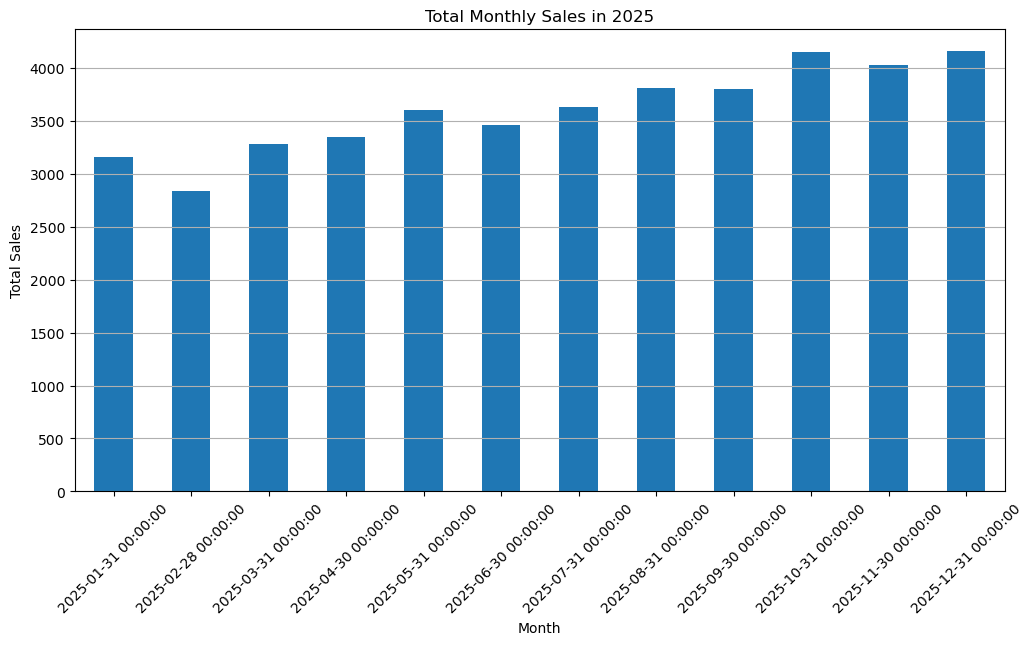

In [ ]:
# Use the resample() method with a frequency string ('M' for month-end)
# Then chain an aggregation method like .sum() or .mean()
monthly_sales = df["sales"].resample("ME").sum()

# print("Total Monthly Sales:")
# display(monthly_sales)

# Plot the results
monthly_sales.plot(kind="bar", title="Total Monthly Sales in 2025")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

---

## Part 4: Rolling Windows

Rolling window calculations are essential for smoothing out short-term fluctuations in time series data and highlighting longer-term trends. A common example is the "moving average."

**Exercise 4.1:** Calculate the 7-day and 30-day moving average for the sales data. Add these as new columns to our original DataFrame `df`.

In [40]:
# Your code here
df["7-day MA"] = df["sales"].rolling(window=7).mean()
df["30-day MA"] = df["sales"].rolling(window=30).mean()

display(df.head(31))

,sales,7-day MA,30-day MA
2025-01-01,118.0,NaN,NaN
2025-01-02,108.1,NaN,NaN
2025-01-03,94.2,NaN,NaN
2025-01-04,87.3,NaN,NaN
2025-01-05,100.4,NaN,NaN
2025-01-06,118.5,NaN,NaN
2025-01-07,98.6,103.585714,NaN
2025-01-08,102.7,101.400000,NaN
2025-01-09,90.8,98.928571,NaN
2025-01-10,90.9,98.457143,NaN


**Solution 4.1:**

In [ ]:
# Use the .rolling() method with the window size
# Then chain an aggregation method like .mean()
df["7-day MA"] = df["sales"].rolling(window=7).mean()
df["30-day MA"] = df["sales"].rolling(window=30).mean()

# Display the DataFrame to see the new columns. Note the NaNs at the beginning!
display(df.head(10))

**Exercise 4.2:** Plot the original daily sales, the 7-day moving average, and the 30-day moving average on the same graph. Observe how the moving averages smooth out the noise.

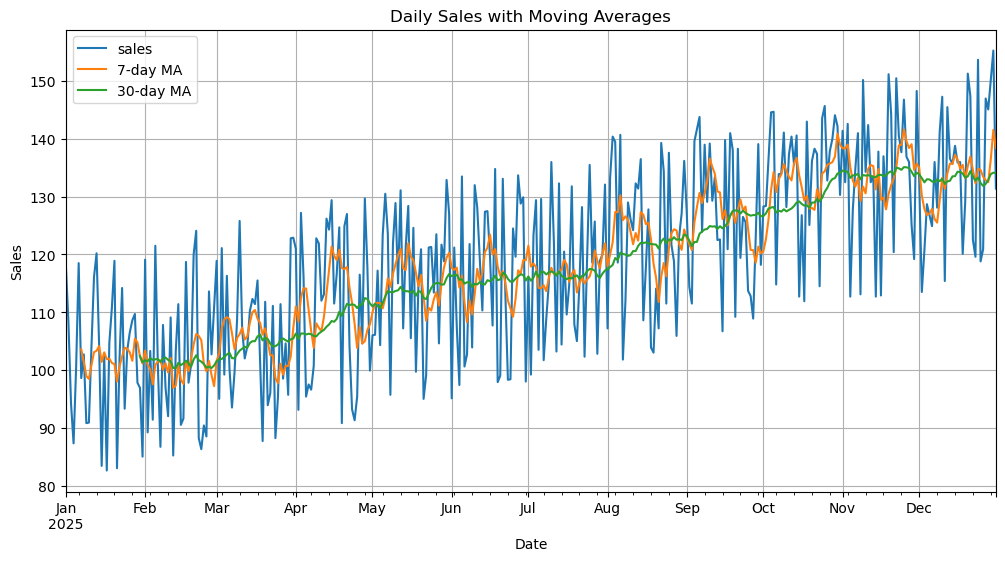

In [42]:
# Your code here
df[["sales", "7-day MA", "30-day MA"]].plot(title = "Daily Sales with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()

**Solution 4.2:**

In [ ]:
df[["sales", "7-day MA", "30-day MA"]].plot(title="Daily Sales with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

Notice how the 7-day average is smoother than the original data, and the 30-day average is even smoother, revealing the underlying upward trend more clearly.

---

### Excellent Work!

You've now mastered the fundamentals of time series analysis in Pandas. These skills are incredibly valuable and form the basis for more advanced topics like forecasting.

Tomorrow is the final day! You will be given a final project to apply all the skills you've learned over the past two weeks—from NumPy and Pandas to Matplotlib and SciPy—to analyze a new dataset from start to finish.